# 1. Regression 회귀 문제
## logistic regression - 분류 문제 이것과는 다름
- 참조 링크 : [link](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-6-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1-%ED%9A%8C%EA%B7%80-%EB%AC%B8%EC%A0%9C/)

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from keras.datasets import boston_housing

In [5]:
(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()

In [6]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [7]:
Y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 1-1) 데이터 정규화

In [8]:
# test 데이터 미포함한 데이터로 정규화 들어가야 함
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

print(f'mean : {mean}')
print(f'std : {std}')
X_train

mean : [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
std : [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

## 1-2) Build model

In [9]:
print(len(X_train))
X_train.shape

404


(404, 13)

In [10]:
print(len(Y_train))
Y_train.shape

404


(404,)

In [11]:
print(len(X_test))
X_test.shape

102


(102, 13)

In [12]:
print(len(Y_test))
Y_test.shape

102


(102,)

In [13]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],) ))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [14]:
help(model.compile)

Help on method compile in module keras.engine.training:

compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    # Arguments
        optimizer: String (name of optimizer) or optimizer instance.
            See [optimizers](/optimizers).
        loss: String (name of objective function) or objective function.
            See [losses](/losses).
            If the model has multiple outputs, you can use a different loss
            on each output by passing a dictionary or a list of losses.
            The loss value that will be minimized by the model
            will then be the sum of all individual losses.
        metrics: List of metrics to be evaluated by the model
            during training and testing.
            Typically you will use `metrics=['accuracy']`.
            To specify different me

In [15]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model

## 1-3) train model

In [16]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  # Arguments
 |      monitor: quantity to be monitored.
 |      min_delta: minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: one of {auto, min, max}. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, the direction is automatic

In [17]:
help(ModelCheckpoint)

Help on class ModelCheckpoint in module keras.callbacks:

class ModelCheckpoint(Callback)
 |  ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
 |  
 |  Save the model after every epoch.
 |  
 |  `filepath` can contain named formatting options,
 |  which will be filled the value of `epoch` and
 |  keys in `logs` (passed in `on_epoch_end`).
 |  
 |  For example: if `filepath` is `weights.{epoch:02d}-{val_loss:.2f}.hdf5`,
 |  then the model checkpoints will be saved with the epoch number and
 |  the validation loss in the filename.
 |  
 |  # Arguments
 |      filepath: string, path to save the model file.
 |      monitor: quantity to monitor.
 |      verbose: verbosity mode, 0 or 1.
 |      save_best_only: if `save_best_only=True`,
 |          the latest best model according to
 |          the quantity monitored will not be overwritten.
 |      mode: one of {auto, min, max}.
 |          If `save_best_only=True`

In [18]:
es = EarlyStopping(patience=200, mode='min', monitor='val_loss')
mc = ModelCheckpoint(filepath='best_model.h5', verbose=1, save_best_only=True, mode='min', monitor='val_loss')

In [19]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a given number of epochs (iterations on a dataset).
    
    # Arguments
        x: Numpy array of training data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has 

In [20]:
hist = model.fit(X_train, Y_train, epochs=3000, verbose=1,
                 validation_split=0.12,
                 callbacks=[es, mc]
                )




Train on 355 samples, validate on 49 samples
Epoch 1/3000





355/355 [==============================] - 1s 3ms/step - loss: 576.8886 - mean_absolute_error: 22.0415 - val_loss: 481.5005 - val_mean_absolute_error: 20.7321

Epoch 00001: val_loss improved from inf to 481.50051, saving model to best_model.h5
Epoch 2/3000
355/355 [==============================] - 0s 82us/step - loss: 528.0253 - mean_absolute_error: 20.8566 - val_loss: 433.8856 - val_mean_absolute_error: 19.4456

Epoch 00002: val_loss improved from 481.50051 to 433.88563, saving model to best_model.h5
Epoch 3/3000
355/355 [==============================] - 0s 82us/step - loss: 468.2571 - mean_absolute_error: 19.3362 - val_loss: 372.8378 - val_mean_absolute_error: 17.8027

Epoch 00003: val_loss improved from 433.88563 to 372.83779, saving model to best_model.h5
Epoch 4/3000
355/355 [==============================] - 0s 76us/step - loss: 391.8539 - mean_absolute_error: 17.3074 - val_loss: 292.3673 - val_mean_absolute_erro

355/355 [==============================] - 0s 79us/step - loss: 15.4317 - mean_absolute_error: 2.7946 - val_loss: 13.0394 - val_mean_absolute_error: 2.9362

Epoch 00026: val_loss improved from 13.08535 to 13.03939, saving model to best_model.h5
Epoch 27/3000
355/355 [==============================] - 0s 73us/step - loss: 15.0789 - mean_absolute_error: 2.7646 - val_loss: 12.5546 - val_mean_absolute_error: 2.8670

Epoch 00027: val_loss improved from 13.03939 to 12.55461, saving model to best_model.h5
Epoch 28/3000
355/355 [==============================] - 0s 73us/step - loss: 14.7022 - mean_absolute_error: 2.7266 - val_loss: 11.7783 - val_mean_absolute_error: 2.7232

Epoch 00028: val_loss improved from 12.55461 to 11.77833, saving model to best_model.h5
Epoch 29/3000
355/355 [==============================] - 0s 79us/step - loss: 14.5162 - mean_absolute_error: 2.7340 - val_loss: 12.0075 - val_mean_absolute_error: 2.7564

Epoch 00029: val_loss did not improve from 11.77833
Epoch 30/3000



Epoch 00059: val_loss improved from 7.35641 to 7.20792, saving model to best_model.h5
Epoch 60/3000
355/355 [==============================] - 0s 76us/step - loss: 9.7860 - mean_absolute_error: 2.1687 - val_loss: 7.4617 - val_mean_absolute_error: 2.2486

Epoch 00060: val_loss did not improve from 7.20792
Epoch 61/3000
355/355 [==============================] - 0s 82us/step - loss: 9.7248 - mean_absolute_error: 2.1549 - val_loss: 7.2033 - val_mean_absolute_error: 2.2016

Epoch 00061: val_loss improved from 7.20792 to 7.20332, saving model to best_model.h5
Epoch 62/3000
355/355 [==============================] - 0s 79us/step - loss: 9.5873 - mean_absolute_error: 2.1676 - val_loss: 7.1560 - val_mean_absolute_error: 2.1892

Epoch 00062: val_loss improved from 7.20332 to 7.15603, saving model to best_model.h5
Epoch 63/3000
355/355 [==============================] - 0s 76us/step - loss: 9.5268 - mean_absolute_error: 2.1542 - val_loss: 7.1528 - val_mean_absolute_error: 2.1961

Epoch 00063: v

355/355 [==============================] - 0s 73us/step - loss: 8.1183 - mean_absolute_error: 1.9942 - val_loss: 6.3657 - val_mean_absolute_error: 2.0168

Epoch 00095: val_loss improved from 6.38192 to 6.36572, saving model to best_model.h5
Epoch 96/3000
355/355 [==============================] - 0s 79us/step - loss: 8.1390 - mean_absolute_error: 1.9777 - val_loss: 6.5393 - val_mean_absolute_error: 2.0734

Epoch 00096: val_loss did not improve from 6.36572
Epoch 97/3000
355/355 [==============================] - 0s 76us/step - loss: 8.1121 - mean_absolute_error: 1.9768 - val_loss: 6.3143 - val_mean_absolute_error: 2.0273

Epoch 00097: val_loss improved from 6.36572 to 6.31430, saving model to best_model.h5
Epoch 98/3000
355/355 [==============================] - 0s 76us/step - loss: 8.1830 - mean_absolute_error: 2.0459 - val_loss: 7.0677 - val_mean_absolute_error: 2.0656

Epoch 00098: val_loss did not improve from 6.31430
Epoch 99/3000
355/355 [==============================] - 0s 79us

355/355 [==============================] - 0s 76us/step - loss: 6.9755 - mean_absolute_error: 1.8411 - val_loss: 6.1220 - val_mean_absolute_error: 1.9875

Epoch 00131: val_loss did not improve from 5.89762
Epoch 132/3000
355/355 [==============================] - 0s 73us/step - loss: 6.9860 - mean_absolute_error: 1.8396 - val_loss: 6.1658 - val_mean_absolute_error: 2.0048

Epoch 00132: val_loss did not improve from 5.89762
Epoch 133/3000
355/355 [==============================] - 0s 76us/step - loss: 7.4136 - mean_absolute_error: 1.8871 - val_loss: 6.2305 - val_mean_absolute_error: 2.0202

Epoch 00133: val_loss did not improve from 5.89762
Epoch 134/3000
355/355 [==============================] - 0s 76us/step - loss: 7.4103 - mean_absolute_error: 1.8686 - val_loss: 5.4827 - val_mean_absolute_error: 1.9143

Epoch 00134: val_loss improved from 5.89762 to 5.48271, saving model to best_model.h5
Epoch 135/3000
355/355 [==============================] - 0s 76us/step - loss: 7.1038 - mean_abs

355/355 [==============================] - 0s 82us/step - loss: 6.2068 - mean_absolute_error: 1.7797 - val_loss: 6.2651 - val_mean_absolute_error: 1.9878

Epoch 00168: val_loss did not improve from 5.48271
Epoch 169/3000
355/355 [==============================] - 0s 82us/step - loss: 6.2671 - mean_absolute_error: 1.8051 - val_loss: 5.9762 - val_mean_absolute_error: 1.9643

Epoch 00169: val_loss did not improve from 5.48271
Epoch 170/3000
355/355 [==============================] - 0s 82us/step - loss: 6.0153 - mean_absolute_error: 1.7357 - val_loss: 5.5096 - val_mean_absolute_error: 1.9001

Epoch 00170: val_loss did not improve from 5.48271
Epoch 171/3000
355/355 [==============================] - 0s 82us/step - loss: 5.8420 - mean_absolute_error: 1.6999 - val_loss: 5.6915 - val_mean_absolute_error: 1.9172

Epoch 00171: val_loss did not improve from 5.48271
Epoch 172/3000
355/355 [==============================] - 0s 79us/step - loss: 5.8851 - mean_absolute_error: 1.6938 - val_loss: 5.6

355/355 [==============================] - 0s 79us/step - loss: 4.9328 - mean_absolute_error: 1.5669 - val_loss: 5.3650 - val_mean_absolute_error: 1.8198

Epoch 00204: val_loss did not improve from 5.17968
Epoch 205/3000
355/355 [==============================] - 0s 76us/step - loss: 5.1383 - mean_absolute_error: 1.5713 - val_loss: 5.4229 - val_mean_absolute_error: 1.8684

Epoch 00205: val_loss did not improve from 5.17968
Epoch 206/3000
355/355 [==============================] - 0s 76us/step - loss: 4.9887 - mean_absolute_error: 1.5854 - val_loss: 5.3223 - val_mean_absolute_error: 1.8499

Epoch 00206: val_loss did not improve from 5.17968
Epoch 207/3000
355/355 [==============================] - 0s 76us/step - loss: 4.8309 - mean_absolute_error: 1.5349 - val_loss: 5.3575 - val_mean_absolute_error: 1.8271

Epoch 00207: val_loss did not improve from 5.17968
Epoch 208/3000
355/355 [==============================] - 0s 76us/step - loss: 4.8191 - mean_absolute_error: 1.5432 - val_loss: 5.1


Epoch 00240: val_loss did not improve from 5.01469
Epoch 241/3000
355/355 [==============================] - 0s 79us/step - loss: 4.0910 - mean_absolute_error: 1.4141 - val_loss: 5.0466 - val_mean_absolute_error: 1.7655

Epoch 00241: val_loss did not improve from 5.01469
Epoch 242/3000
355/355 [==============================] - 0s 73us/step - loss: 4.0196 - mean_absolute_error: 1.4013 - val_loss: 5.0665 - val_mean_absolute_error: 1.7664

Epoch 00242: val_loss did not improve from 5.01469
Epoch 243/3000
355/355 [==============================] - ETA: 0s - loss: 3.6934 - mean_absolute_error: 1.464 - 0s 76us/step - loss: 3.9684 - mean_absolute_error: 1.3836 - val_loss: 5.1572 - val_mean_absolute_error: 1.7914

Epoch 00243: val_loss did not improve from 5.01469
Epoch 244/3000
355/355 [==============================] - 0s 73us/step - loss: 4.2081 - mean_absolute_error: 1.4661 - val_loss: 5.2741 - val_mean_absolute_error: 1.7686

Epoch 00244: val_loss did not improve from 5.01469
Epoch 245/

355/355 [==============================] - 0s 76us/step - loss: 3.8442 - mean_absolute_error: 1.3725 - val_loss: 5.2571 - val_mean_absolute_error: 1.8358

Epoch 00277: val_loss did not improve from 4.98349
Epoch 278/3000
355/355 [==============================] - 0s 76us/step - loss: 3.4811 - mean_absolute_error: 1.3420 - val_loss: 5.2134 - val_mean_absolute_error: 1.7981

Epoch 00278: val_loss did not improve from 4.98349
Epoch 279/3000
355/355 [==============================] - 0s 76us/step - loss: 3.7443 - mean_absolute_error: 1.3578 - val_loss: 5.0421 - val_mean_absolute_error: 1.7352

Epoch 00279: val_loss did not improve from 4.98349
Epoch 280/3000
355/355 [==============================] - 0s 76us/step - loss: 3.3611 - mean_absolute_error: 1.3062 - val_loss: 5.1617 - val_mean_absolute_error: 1.8087

Epoch 00280: val_loss did not improve from 4.98349
Epoch 281/3000
355/355 [==============================] - 0s 76us/step - loss: 3.3320 - mean_absolute_error: 1.2814 - val_loss: 5.0

355/355 [==============================] - 0s 76us/step - loss: 2.9957 - mean_absolute_error: 1.2550 - val_loss: 5.2383 - val_mean_absolute_error: 1.8093

Epoch 00314: val_loss did not improve from 4.98349
Epoch 315/3000
355/355 [==============================] - 0s 76us/step - loss: 2.9036 - mean_absolute_error: 1.2342 - val_loss: 5.3088 - val_mean_absolute_error: 1.8406

Epoch 00315: val_loss did not improve from 4.98349
Epoch 316/3000
355/355 [==============================] - 0s 73us/step - loss: 2.8901 - mean_absolute_error: 1.2142 - val_loss: 5.2973 - val_mean_absolute_error: 1.8438

Epoch 00316: val_loss did not improve from 4.98349
Epoch 317/3000
355/355 [==============================] - 0s 70us/step - loss: 2.9853 - mean_absolute_error: 1.2566 - val_loss: 5.4951 - val_mean_absolute_error: 1.8843

Epoch 00317: val_loss did not improve from 4.98349
Epoch 318/3000
355/355 [==============================] - 0s 70us/step - loss: 3.0227 - mean_absolute_error: 1.2345 - val_loss: 5.3

355/355 [==============================] - 0s 79us/step - loss: 2.6345 - mean_absolute_error: 1.1811 - val_loss: 5.8808 - val_mean_absolute_error: 1.9717

Epoch 00351: val_loss did not improve from 4.98349
Epoch 352/3000
355/355 [==============================] - 0s 73us/step - loss: 2.5957 - mean_absolute_error: 1.1297 - val_loss: 5.6238 - val_mean_absolute_error: 1.8507

Epoch 00352: val_loss did not improve from 4.98349
Epoch 353/3000
355/355 [==============================] - 0s 76us/step - loss: 2.5309 - mean_absolute_error: 1.1427 - val_loss: 5.6798 - val_mean_absolute_error: 1.8947

Epoch 00353: val_loss did not improve from 4.98349
Epoch 354/3000
355/355 [==============================] - 0s 73us/step - loss: 2.5090 - mean_absolute_error: 1.1241 - val_loss: 5.6836 - val_mean_absolute_error: 1.8799

Epoch 00354: val_loss did not improve from 4.98349
Epoch 355/3000
355/355 [==============================] - 0s 73us/step - loss: 2.5009 - mean_absolute_error: 1.1268 - val_loss: 5.7

355/355 [==============================] - 0s 76us/step - loss: 2.7079 - mean_absolute_error: 1.2066 - val_loss: 6.0774 - val_mean_absolute_error: 1.8956

Epoch 00388: val_loss did not improve from 4.98349
Epoch 389/3000
355/355 [==============================] - 0s 73us/step - loss: 2.5477 - mean_absolute_error: 1.1723 - val_loss: 6.3324 - val_mean_absolute_error: 1.9683

Epoch 00389: val_loss did not improve from 4.98349
Epoch 390/3000
355/355 [==============================] - 0s 79us/step - loss: 2.3326 - mean_absolute_error: 1.1016 - val_loss: 5.8391 - val_mean_absolute_error: 1.8729

Epoch 00390: val_loss did not improve from 4.98349
Epoch 391/3000
355/355 [==============================] - 0s 79us/step - loss: 2.4665 - mean_absolute_error: 1.1124 - val_loss: 5.9048 - val_mean_absolute_error: 1.8751

Epoch 00391: val_loss did not improve from 4.98349
Epoch 392/3000
355/355 [==============================] - 0s 82us/step - loss: 2.2207 - mean_absolute_error: 1.0441 - val_loss: 5.9

355/355 [==============================] - 0s 79us/step - loss: 2.1716 - mean_absolute_error: 1.0619 - val_loss: 6.3484 - val_mean_absolute_error: 1.9926

Epoch 00425: val_loss did not improve from 4.98349
Epoch 426/3000
355/355 [==============================] - 0s 76us/step - loss: 2.1576 - mean_absolute_error: 1.0564 - val_loss: 6.3069 - val_mean_absolute_error: 1.9750

Epoch 00426: val_loss did not improve from 4.98349
Epoch 427/3000
355/355 [==============================] - 0s 76us/step - loss: 2.0663 - mean_absolute_error: 1.0131 - val_loss: 6.0203 - val_mean_absolute_error: 1.8790

Epoch 00427: val_loss did not improve from 4.98349
Epoch 428/3000
355/355 [==============================] - 0s 76us/step - loss: 2.1036 - mean_absolute_error: 1.0438 - val_loss: 6.4114 - val_mean_absolute_error: 2.0571

Epoch 00428: val_loss did not improve from 4.98349
Epoch 429/3000
355/355 [==============================] - 0s 79us/step - loss: 2.0990 - mean_absolute_error: 1.0243 - val_loss: 6.0

355/355 [==============================] - 0s 76us/step - loss: 1.9052 - mean_absolute_error: 0.9970 - val_loss: 6.4347 - val_mean_absolute_error: 2.0340

Epoch 00462: val_loss did not improve from 4.98349
Epoch 463/3000
355/355 [==============================] - 0s 79us/step - loss: 1.8557 - mean_absolute_error: 0.9473 - val_loss: 6.0828 - val_mean_absolute_error: 1.8455

Epoch 00463: val_loss did not improve from 4.98349


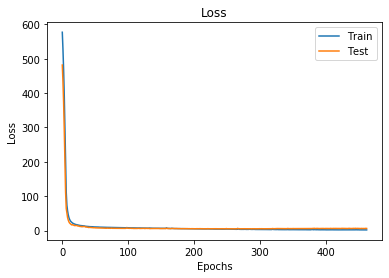

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

In [22]:
# loss / metric scores each
model.evaluate(X_test, Y_test)

102/102 [==============================] - 0s 196us/step


[10.472205966126685, 2.198272873373593]